Christabel Membere - 01703600

## Single peak: DWT Application
*This notebook is for displaying the effects of applying a discrete wavelet transform to a single peak in a raw signal.*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from scipy.signal import find_peaks
from scipy.io import loadmat
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
from dtaidistance import dtw

#### Step 1: Single Peak and DWT Coeffs   
The following code has been implemented from the 'Isolated DWT Model' 

Upper Threshold: 535.4755183106122
Lower Threshold: 499.44448168938794
DTW Distance: 2691.459133160204


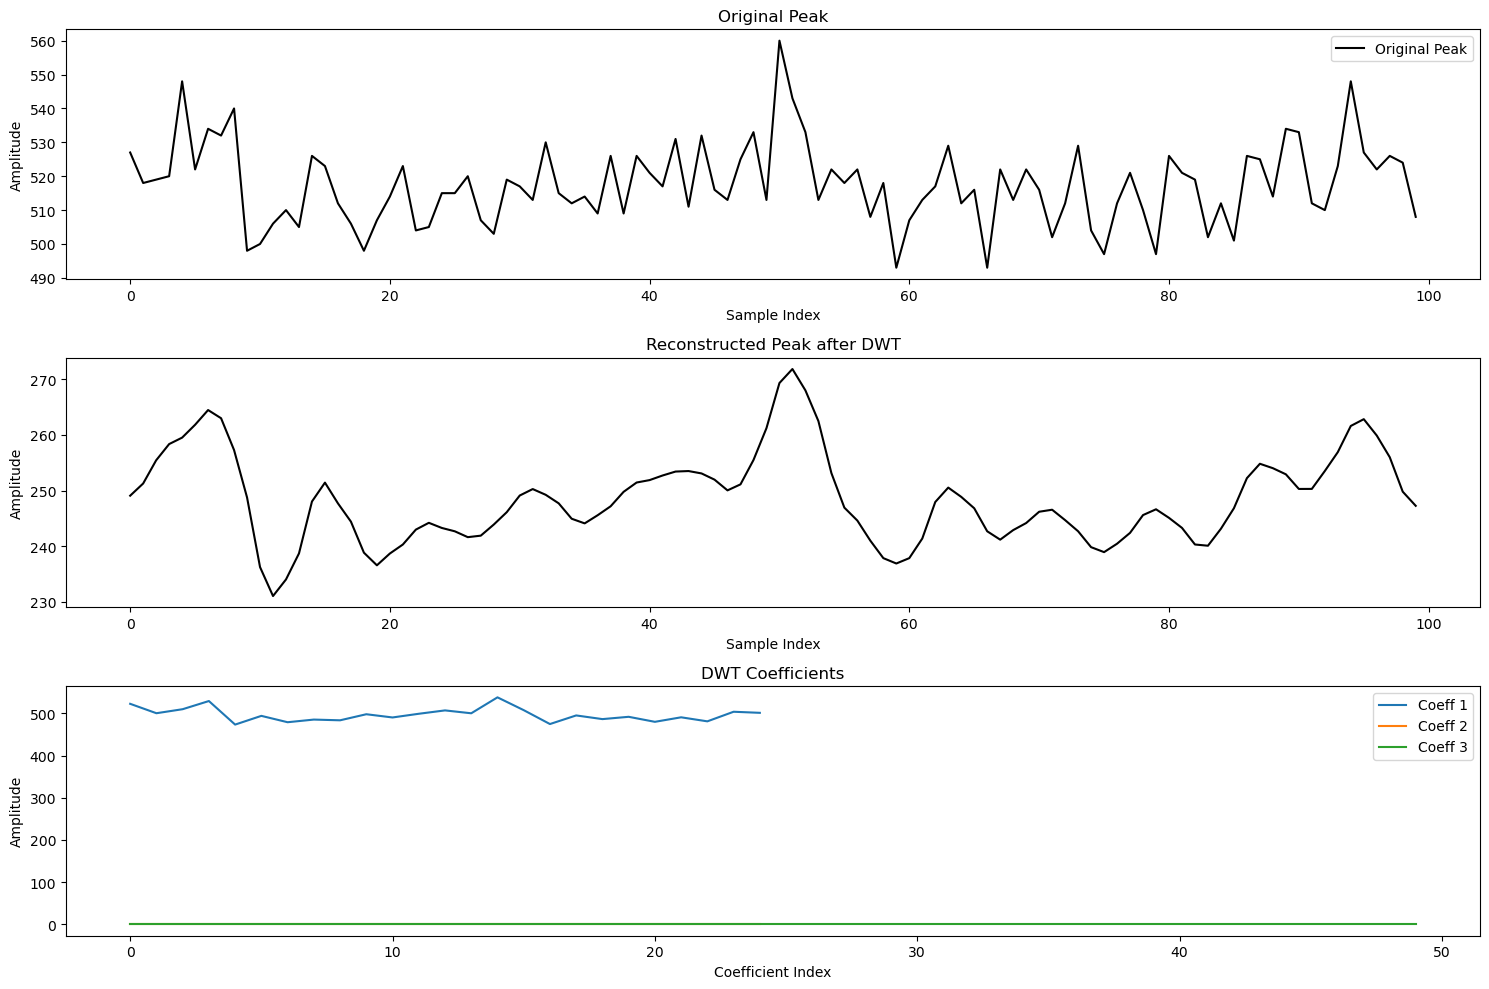

In [14]:
def calculate_threshold(data, upper_multiplier, lower_multiplier=None):
    std_dev = np.std(data)
    mean_val = np.mean(data)
    upper_threshold = mean_val + upper_multiplier * std_dev

    if lower_multiplier is not None:
        lower_threshold = mean_val - lower_multiplier * std_dev
        return upper_threshold, lower_threshold, mean_val, std_dev

    return upper_threshold, mean_val, std_dev

def detect_peaks_troughs(data, is_resistive=False):
    lower_threshold = None
    if is_resistive:
        upper_threshold, lower_threshold, _, _ = calculate_threshold(data, 1.5, 1.5)
    else:
        upper_threshold, _, _ = calculate_threshold(data, 1.5)

    upper_peaks, _ = find_peaks(data, height=upper_threshold, distance=200, width=3)
    lower_peaks = None

    if is_resistive:
        lower_peaks, _ = find_peaks(-data, height=-lower_threshold, distance=200, width=3)

    return upper_peaks, lower_peaks

def isolate_event(y_data, peak_index, window_size):
    start_idx = max(0, peak_index - window_size // 2)
    end_idx = min(len(y_data), peak_index + window_size // 2)
    return y_data[start_idx:end_idx]

def compute_dwt(signal, wavelet='db4', level=2, thresh=0.5, mode='soft', target_length=None):

    coeffs = pywt.wavedec(signal, wavelet, level=level, mode='per')

    max_coeff = max(np.max(np.abs(c)) for c in coeffs)
    threshold = thresh * max_coeff
    coeffs = [pywt.threshold(c, value=threshold, mode=mode) for c in coeffs]

    coeffs_flat = np.hstack(coeffs)

    if target_length is not None and len(coeffs_flat) < target_length:
        coeffs_flat = np.pad(coeffs_flat, (0, target_length - len(coeffs_flat)), 'constant', constant_values=np.nan)

    reconstructed_signal = pywt.waverec(coeffs, wavelet, mode='per')
    if len(reconstructed_signal) > len(signal):
        reconstructed_signal = reconstructed_signal[:len(signal)]
    
    return coeffs, reconstructed_signal

def plot_peak_before_after_dwt(signal, peak_index, wavelet='db1', thresh=0.5, mode='soft', window_size=100):

    original_peak = isolate_event(signal, peak_index, window_size)
    
    coeffs, reconstructed_peak = compute_dwt(original_peak, wavelet=wavelet, thresh=thresh, mode=mode, target_length=len(original_peak))

    original_peak = original_peak.ravel()
    reconstructed_peak = reconstructed_peak.ravel()
    
    mean_val = np.mean(original_peak)
    std_dev = np.std(original_peak)
    upper_threshold = mean_val + 1.5 * std_dev
    lower_threshold = mean_val - 1.5 * std_dev
    
    print(f"Upper Threshold: {upper_threshold}")
    print(f"Lower Threshold: {lower_threshold}")

    distance = dtw.distance(original_peak, reconstructed_peak)
    print(f"DTW Distance: {distance}")
    
    plt.figure(figsize=(15, 10))
    
    plt.subplot(3, 1, 1)
    plt.plot(original_peak, color='black', label='Original Peak')
    # plt.axhline(y=upper_threshold, color='r', linestyle='--', label='Upper Threshold')
    # plt.axhline(y=lower_threshold, color='b', linestyle='--', label='Lower Threshold')
    plt.title('Original Peak')
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    plt.legend()
    
    plt.subplot(3, 1, 2)
    plt.plot(reconstructed_peak, color='black', label='Reconstructed Peak')
    plt.title('Reconstructed Peak after DWT')
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    
    plt.subplot(3, 1, 3)
    for i, coeff in enumerate(coeffs):
        plt.plot(coeff, label=f'Coeff {i+1}')
    plt.title('DWT Coefficients')
    plt.xlabel('Coefficient Index')
    plt.ylabel('Amplitude')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

file_path = '/Users/christabel/Documents/MASTERS/PROJECT/MATLAB/Final_array2.mat'
mat_data = loadmat(file_path)

signals = mat_data['Final_array2'].flatten()
signals = [signal.flatten() for signal in signals]

signal = signals[10]
upper_peaks, _ = detect_peaks_troughs(signal)

if len(upper_peaks) > 0:
    peak_index = upper_peaks[1]  # The first detected peak
    plot_peak_before_after_dwt(signal, peak_index, wavelet='db4', thresh=0.5, mode='soft', window_size=100) 
else:
    print("No peaks found in the signal.")

#### Step 2: Original and Reconstructed signals with thresholds 

Upper Threshold: 619.7264297085849
Mean Value: 426.2782874617737, Std Dev: 64.48271408227042
Signal Min: 249, Signal Max: 697
Upper Threshold: 597.2873462343684
Lower Threshold: 264.2548997549364


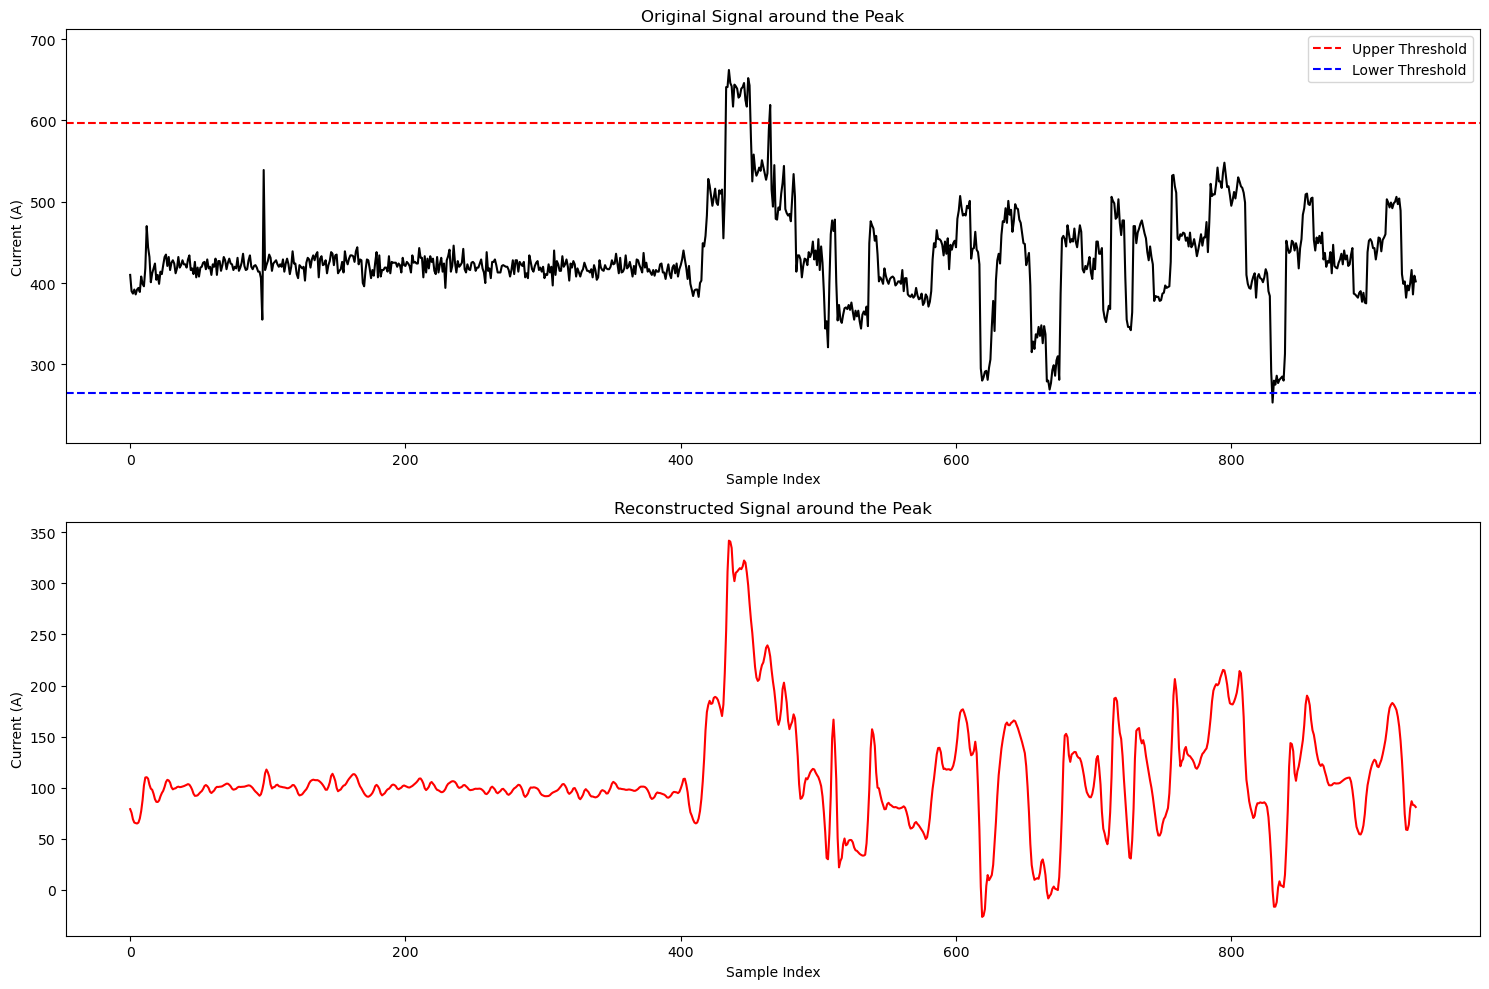

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.signal import find_peaks

def calculate_threshold(data, upper_multiplier, lower_multiplier=None):
    std_dev = np.std(data)
    mean_val = np.mean(data)
    upper_threshold = mean_val + upper_multiplier * std_dev

    if lower_multiplier is not None:
        lower_threshold = mean_val - lower_multiplier * std_dev
        return upper_threshold, lower_threshold, mean_val, std_dev

    return upper_threshold, mean_val, std_dev

def detect_peaks_troughs(data, is_resistive=False):

    upper_multiplier = 3  
    lower_multiplier = 3  
    
    upper_threshold, lower_threshold, mean_val, std_dev = calculate_threshold(signal, upper_multiplier, lower_multiplier)
    
    print(f"Upper Threshold: {upper_threshold}")
    print(f"Mean Value: {mean_val}, Std Dev: {std_dev}")
    print(f"Signal Min: {np.min(data)}, Signal Max: {np.max(data)}")

    # Adjust parameters for peak detection
    upper_peaks, _ = find_peaks(data, height=upper_threshold * 0.8, distance=50, width=10)
    
    lower_peaks = None
    if is_resistive:
        lower_threshold, _ = calculate_threshold(data, multiplier=3)
        lower_peaks, _ = find_peaks(-data, height=-lower_threshold * 0.8, distance=50, width=10)

    return upper_peaks, lower_peaks

def isolate_event(x_data, y_data, peak_index, window_size=500):
    start_idx = max(0, peak_index - window_size)
    end_idx = min(len(y_data), peak_index + window_size)
    return y_data[start_idx:end_idx]

def plot_single_peak_before_after_dwt(signal, peak_index, window_size=500):
    # Isolate the event around the peak
    original_signal = isolate_event(np.arange(len(signal)), signal, peak_index, window_size)
    
    _, reconstructed_signal = compute_dwt(original_signal, target_length=len(original_signal))
    
    mean_val = np.mean(original_signal)
    std_dev = np.std(original_signal)
    upper_threshold = mean_val + 3 * std_dev
    lower_threshold = mean_val - 3 * std_dev
    
    print(f"Upper Threshold: {upper_threshold}")
    print(f"Lower Threshold: {lower_threshold}")

    plt.figure(figsize=(15, 10))
    
    plt.subplot(2, 1, 1)
    plt.plot(original_signal, color='black')
    plt.title('Original Signal around the Peak')
    plt.xlabel('Sample Index')
    plt.ylabel('Current (A)')
    
    plt.axhline(y=upper_threshold, color='r', linestyle='--', label='Upper Threshold')
    if lower_threshold is not None:
        plt.axhline(y=lower_threshold, color='b', linestyle='--', label='Lower Threshold')
    
    plt.ylim(min(original_signal.min(), lower_threshold if lower_threshold is not None else original_signal.min()) - 50,
             max(original_signal.max(), upper_threshold) + 50)
    plt.legend()
    
    plt.subplot(2, 1, 2)
    plt.plot(reconstructed_signal, color='red')
    plt.title('Reconstructed Signal around the Peak')
    plt.xlabel('Sample Index')
    plt.ylabel('Current (A)')
    
    plt.tight_layout()
    plt.show()

# Load the .mat file and extract signals
file_path = '/Users/christabel/Documents/MASTERS/PROJECT/MATLAB/Final_array2.mat'
mat_data = loadmat(file_path)

signals = mat_data['Final_array'].flatten()
signals = [signal.flatten() for signal in signals]

# Select a signal to analyze (e.g., the first one [0])
signal = signals[0]

# Detect peaks in the selected signal
upper_peaks, _ = detect_peaks_troughs(signal)

if len(upper_peaks) > 0:
    plot_single_peak_before_after_dwt(signal, upper_peaks[0])
else:
    print("No peaks found in the signal.")

#### Documentation of previous code that failed

In [27]:
# import numpy as np
# import pywt
# import matplotlib.pyplot as plt
# from scipy.io import loadmat
# from scipy.signal import find_peaks

# # Threshold calculation with adjusted multipliers
# def calculate_threshold(data, upper_multiplier, lower_multiplier=None):
#     std_dev = np.std(data)
#     mean_val = np.mean(data)
#     upper_threshold = mean_val + upper_multiplier * std_dev

#     if lower_multiplier is not None:
#         lower_threshold = mean_val - lower_multiplier * std_dev
#         return upper_threshold, lower_threshold, mean_val, std_dev

#     return upper_threshold, mean_val, std_dev

# # Peak detection with updated parameters
# def detect_peaks_troughs(data, is_resistive=False):
#     lower_threshold = None
#     if is_resistive:
#         upper_threshold, lower_threshold, _, _ = calculate_threshold(data, 5, 5)
#     else:
#         upper_threshold, _, _ = calculate_threshold(data, 5)

#     # Print thresholds for debugging
#     print(f"Upper Threshold: {upper_threshold}")
#     print(f"Lower Threshold: {lower_threshold}")

#     # Detect peaks
#     upper_peaks, _ = find_peaks(data, height=upper_threshold, distance=50, width=10)
#     valid_peaks = [peak for peak in upper_peaks if peak > 10]

#     lower_peaks = None
#     if is_resistive:
#         lower_peaks, _ = find_peaks(-data, height=-lower_threshold, distance=50, width=10)

#     return valid_peaks, lower_peaks

# # Event isolation
# def isolate_event(x_data, y_data, peak_index, window_size=500):
#     start_idx = max(0, peak_index - window_size)
#     end_idx = min(len(y_data), peak_index + window_size)
#     return y_data[start_idx:end_idx]

# # DWT computation and signal reconstruction
# def compute_dwt(signal, target_length=1024):
#     coeffs = pywt.wavedec(signal, 'db1', level=4)
#     coeffs_flat = np.hstack(coeffs)

#     if len(coeffs_flat) < target_length:
#         coeffs_flat = np.pad(coeffs_flat, (0, target_length - len(coeffs_flat)), 'constant', constant_values=np.nan)

#     reconstructed_signal = pywt.waverec(coeffs, 'db1', mode='per')
#     if len(reconstructed_signal) > len(signal):
#         reconstructed_signal = reconstructed_signal[:len(signal)]

#     return coeffs_flat, reconstructed_signal

# # Plotting function for a single peak before and after DWT
# def plot_single_peak_before_after_dwt(signal, peak_index, window_size=500):
#     # Isolate the event around the peak
#     original_signal = isolate_event(np.arange(len(signal)), signal, peak_index, window_size)
    
#     # Apply DWT and reconstruct the signal
#     _, reconstructed_signal = compute_dwt(original_signal, target_length=len(original_signal))
    
#     # Calculate thresholds
#     mean_val = np.mean(original_signal)
#     std_dev = np.std(original_signal)
#     upper_threshold = mean_val + 5 * std_dev
#     lower_threshold = mean_val - 5 * std_dev
    
#     # Print threshold values for debugging
#     print(f"Upper Threshold: {upper_threshold}")
#     print(f"Lower Threshold: {lower_threshold}")

#     # Plot the original and reconstructed signals
#     plt.figure(figsize=(15, 10))
    
#     plt.subplot(2, 1, 1)
#     plt.plot(original_signal, color='black')
#     plt.title('Original Signal around the Peak')
#     plt.xlabel('Sample Index')
#     plt.ylabel('Current (A)')
    
#     # Add threshold lines
#     plt.axhline(y=upper_threshold, color='r', linestyle='--', label='Upper Threshold')
#     plt.axhline(y=lower_threshold, color='b', linestyle='--', label='Lower Threshold')
    
#     # Adjust y-axis limits
#     plt.ylim(min(original_signal.min(), lower_threshold) - 50, max(original_signal.max(), upper_threshold) + 50)
#     plt.legend()
    
#     plt.subplot(2, 1, 2)
#     plt.plot(reconstructed_signal, color='red')
#     plt.title('Reconstructed Signal around the Peak')
#     plt.xlabel('Sample Index')
#     plt.ylabel('Current (A)')
    
#     plt.tight_layout()
#     plt.show()

# # Load the .mat file and extract signals
# file_path = '/Users/christabel/Documents/MASTERS/PROJECT/MATLAB/Final_array.mat'
# mat_data = loadmat(file_path)

# # Get original signals
# signals = mat_data['Final_array'].flatten()
# signals = [signal.flatten() for signal in signals]

# # Select a signal to analyze (e.g., the first one)
# signal = signals[0]

# # Detect peaks in the selected signal
# upper_peaks, _ = detect_peaks_troughs(signal)

# # Plot the first peak before and after DWT
# if len(upper_peaks) > 0:
#     plot_single_peak_before_after_dwt(signal, upper_peaks[0])
# else:
#     print("No peaks found in the signal.")

In [ ]:
# # Main execution
# file_path = '/Users/christabel/Documents/MASTERS/PROJECT/MATLAB/Final_array.mat'
# mat_data = loadmat(file_path)

# # Get original signals
# signals = mat_data['Final_array'].flatten()
# signals = [signal.flatten() for signal in signals]

# # Select a signal to analyze (e.g., the first one)
# signal = signals[0]

# # Visualize the signal
# plt.figure(figsize=(15, 5))
# plt.plot(signal, color='blue')
# plt.title('Original Signal')
# plt.xlabel('Sample Index')
# plt.ylabel('Current (A)')
# plt.show()

# # Print signal statistics
# mean_val = np.mean(signal)
# std_dev = np.std(signal)
# upper_threshold, lower_threshold, mean_val, std_dev = calculate_threshold(signal, 5, 5)
# print(f"Mean: {mean_val}, Std Dev: {std_dev}")
# print(f"Upper Threshold: {upper_threshold}, Lower Threshold: {lower_threshold}")

# # Detect peaks in the selected signal with adjusted parameters
# upper_peaks, _ = detect_peaks_troughs(signal)

# # Plot the first peak before and after DWT
# if len(upper_peaks) > 0:
#     plot_single_peak_before_after_dwt(signal, upper_peaks[0])
# else:
#     print("No peaks found in the signal.")

In [5]:
# # Threshold calculation with adjusted multipliers
# def calculate_threshold(data, upper_multiplier, lower_multiplier=None):
#     std_dev = np.std(data)
#     mean_val = np.mean(data)
#     upper_threshold = mean_val + upper_multiplier * std_dev

#     if lower_multiplier is not None:
#         lower_threshold = mean_val - lower_multiplier * std_dev
#         return upper_threshold, lower_threshold, mean_val, std_dev

#     return upper_threshold, mean_val, std_dev

# # Peak detection with updated parameters
# def detect_peaks_troughs(data, is_resistive=False):
#     lower_threshold = None
#     if is_resistive:
#         upper_threshold, lower_threshold, _, _ = calculate_threshold(data, 5, 5)
#     else:
#         upper_threshold, _, _ = calculate_threshold(data, 5)

#     # Print thresholds for debugging
#     print(f"Upper Threshold: {upper_threshold}")
#     print(f"Lower Threshold: {lower_threshold}")

#     upper_peaks, _ = find_peaks(data, height=upper_threshold, distance=50, width=10)
#     valid_peaks = [peak for peak in upper_peaks if peak > 10]

#     lower_peaks = None
#     if is_resistive:
#         lower_peaks, _ = find_peaks(-data, height=-lower_threshold, distance=50, width=10)

#     return valid_peaks, lower_peaks

# # Event isolation
# def isolate_event(x_data, y_data, peak_index, window_size=500):
#     start_idx = max(0, peak_index - window_size)
#     end_idx = min(len(y_data), peak_index + window_size)
#     return y_data[start_idx:end_idx]

# # DWT computation and signal reconstruction
# def compute_dwt(signal, target_length=1024):
#     coeffs = pywt.wavedec(signal, 'db1', level=4)
#     coeffs_flat = np.hstack(coeffs)

#     if len(coeffs_flat) < target_length:
#         coeffs_flat = np.pad(coeffs_flat, (0, target_length - len(coeffs_flat)), 'constant', constant_values=np.nan)

#     reconstructed_signal = pywt.waverec(coeffs, 'db1', mode='per')
#     if len(reconstructed_signal) > len(signal):
#         reconstructed_signal = reconstructed_signal[:len(signal)]

#     return coeffs_flat, reconstructed_signal

# # Plotting function for a single peak before and after DWT
# def plot_single_peak_before_after_dwt(signal, peak_index, window_size=500):
#     # Isolate the event around the peak
#     original_signal = isolate_event(np.arange(len(signal)), signal, peak_index, window_size)
    
#     # Apply DWT and reconstruct the signal
#     _, reconstructed_signal = compute_dwt(original_signal, target_length=len(original_signal))
    
#     # Plot the original and reconstructed signals
#     plt.figure(figsize=(15, 10))
    
#     plt.subplot(2, 1, 1)
#     plt.plot(original_signal, color='black')
#     plt.title('Original Signal around the Peak')
#     plt.xlabel('Sample Index')
#     plt.ylabel('Current (A)')
#     plt.ylim(0, 800)
#     plt.yticks(range(0, 810, 100))
    
#     plt.subplot(2, 1, 2)
#     plt.plot(reconstructed_signal, color='red')
#     plt.title('Reconstructed Signal around the Peak')
#     plt.xlabel('Sample Index')
#     plt.ylabel('Current (A)')
    
#     plt.tight_layout()
#     plt.show()

# # Main execution
# file_path = '/Users/christabel/Documents/MASTERS/PROJECT/MATLAB/Final_array.mat'
# mat_data = loadmat(file_path)

# # Get original signals
# signals = mat_data['Final_array'].flatten()
# signals = [signal.flatten() for signal in signals]

# # Select a signal to analyze (e.g., the first one)
# signal = signals[0]

# # Visualize the signal
# plt.figure(figsize=(15, 5))
# plt.plot(signal, color='blue')
# plt.title('Original Signal')
# plt.xlabel('Sample Index')
# plt.ylabel('Current (A)')
# plt.show()

# # Print signal statistics
# mean_val = np.mean(signal)
# std_dev = np.std(signal)
# upper_threshold, lower_threshold, mean_val, std_dev = calculate_threshold(signal, 5, 5)
# print(f"Mean: {mean_val}, Std Dev: {std_dev}")
# print(f"Upper Threshold: {upper_threshold}, Lower Threshold: {lower_threshold}")

# # Detect peaks in the selected signal with adjusted parameters
# upper_peaks, _ = detect_peaks_troughs(signal)

# # Plot the first peak before and after DWT
# if len(upper_peaks) > 0:
#     plot_single_peak_before_after_dwt(signal, upper_peaks[0])
# else:
#     print("No peaks found in the signal.")